<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_B_Section_17_1_to_17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework #2- Denysse Sevilla

## Section 17.1: Interpolation Problem Statement

**Interpolation** is a mathematical way of deriving a function that estimates unknown values through the use of discrete, known data points in a dataset. This function is known as an **interpolation function**.

## Section 17.2: Linear Interpolation

A type of interpolation is **linear interpolation**, where the estimated point is assumed to be between the two nearest points. Assuming that $x_i < x_{i+1} $, where **x** is the point such that $ x_i < x < x_{i+1} $, then

$ ŷ(x) = y_i + \frac{(y_{i+1} - y_i)(x-x_i)}{(x_{i+1} - x_i)} $.

This interpolation function is used to create a series of line segments which altogether create a curve.

On Python scipy's function *interp1d* can be used to calculate the linear interpolation at a given value.

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [ ]:
# Find the linear interpolation at x=1.75 based on the data x= [0, 2, 4], y= [1, 3, 5].
x = [1, 2, 4]
y = [1, 3, 5]

f = interp1d(x,y)
y_hat = f(1.75)
print(y_hat)

2.5


To Check:

\
Since 1 < x < 2, we use the first and second data points to compute the linear interpolation. Plugging in the corresponding values gives

\
$ ŷ(x) = y_i + \frac{(y_{i+1} - y_i)(x-x_i)}{(x_{i+1} - x_i)} = 1 + \frac{(3 - 1)(1.75-1)}{(2 - 1)} = 2.5. $


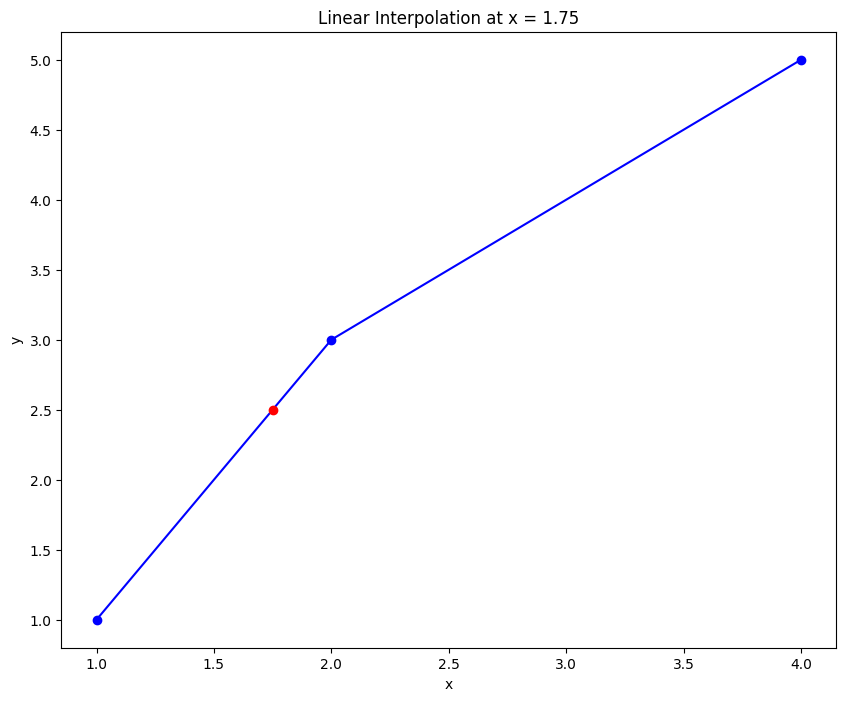

In [ ]:
# Plotting the linear interpolation
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.75, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.75')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.3: Cubic Spline Interpolation

Another form of interpolation is **cubic spline interpolation**, where instead of linear lines, continuous curves are created using a set of piecewise cubic functions of degree three.

\
Assuming that  $ x_i \leq x \leq  x_{i+1} $ for i=1, .., n-1, then the two points nearest the estimated point, $ (x_i, y_i) $ and $ (x_{i+1}, y_{i+1}) $ , are joined by the cubic polynomial

\
$ S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i $,

\
where the coefficients $ a_i, b_i, c_i, d_i $ are calculated for each function.

Note:


*   For *n* points, there are n-1 cubic functions
*   Each function requires four coefficients
* Two equations are required to compute the boundary conditions

\
In Python, *scipy's* function *CubicSpline* can be used to perform cubic spline interpolation. Note that there are different ways to add the final two contraints in scipy.





In [2]:
# Plot the cubic spline interpolation of the data set x = [1, 2, 5] and y=[2, 3, 8] for 1 <= x <= 5.
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt


In [9]:
x = [1, 2, 5]
y = [2, 8, 3]

# Note: use the argument bc_type to specify the constraints
f = CubicSpline(x, y, bc_type = 'natural') # specifies natural boundary conditions
x_new = np.linspace(1, 5, 100)
y_new = f(x_new)

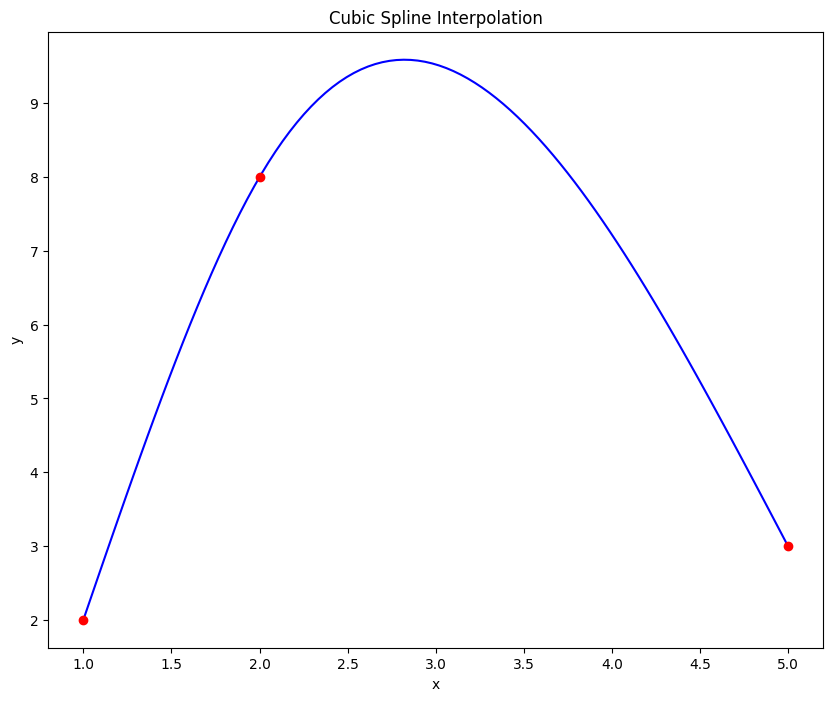

In [10]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()